In [1]:
import numpy as np
import tensorflow as tf # gives warning from h5py but it is fine.
from matplotlib import pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output as clc
import sys
import pandas as pd

def stats(data, others=dict()):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame()
    stats = pd.concat([data.nunique(), data.dtypes, data.isnull().sum()], axis=1)
    stats.columns = ['Unique', 'Dtypes', 'NaN Count']
    for k,v in others.items():
        stats[k] = v(data)
    return stats

def page(data, wrap_cols=14):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame().T
    for i in range(wrap_cols, data.shape[1]+wrap_cols, wrap_cols):
        print ('Columns', i-wrap_cols, '-', min(i-1,data.shape[1]-1))
        display(data.iloc[:, i-wrap_cols:i])

C:\Users\spenc\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
tf.__version__

'1.7.0'

In [3]:
# Import dataset
D0 = pd.read_csv ('train_final.csv', index_col=0)
DTest = pd.read_csv ('test_final.csv', index_col=0)
page (D0.head ())
page (DTest.head ())

Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
id,,,,,,,,,,,,,,
1,0,1,0,0.107576,0,0.0,1,1,1,1,0,32,1,1
2,0,1,0,0.142357,0,0.0,7,1,1,1,1,44,1,1
3,0,1,0,0.492318,0,3.0,4205,1,1,3,1,32,1,1
4,0,1,0,-0.053028,0,2.0,2,1,1,5,2,46,1,1
5,0,1,0,0.730797,0,0.0,11,1,1,1,1,35,1,1


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,
1,0,1,1.77,1,104,22902.0,1,0,18,0.042295,1,0,27,0.028250
2,0,1,5.31,1,144,11400.0,1,0,8,0.021417,1,0,67,0.253574
3,0,1,1.77,1,112,4833.0,1,0,13,0.502212,1,1,35,0.373397
4,0,1,3.54,1,127,3250.0,1,1,8,0.000000,1,0,50,0.674254
5,0,1,1.77,2,148,4000.0,1,1,5,0.787592,1,0,71,0.371157


Columns 0 - 13


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
id,,,,,,,,,,,,,,
49999,1,0,0.460297,0,0.0,1,1,1,1,3,35,1,1,0
50000,1,0,0.112573,0,3.0,2,1,1,1,1,40,1,1,0
50001,1,0,0.061461,1,0.0,29,1,1,3,1,34,1,1,0
50002,1,0,0.523372,0,0.0,1,1,1,1,0,42,1,1,0
50003,1,0,0.586772,0,2.0,44188,1,1,7,1,38,1,1,0


Columns 14 - 26


,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,
49999,1,5.31,1,127,5016.0,1,0,8,0.405964,1,2,50,0.943392
50000,1,3.54,1,137,8300.0,1,5,5,0.100761,1,0,60,0.161306
50001,2,1.77,1,142,NaN,1,5,4,0.063096,1,0,65,705.000000
50002,1,42.48,1,160,2500.0,1,1,7,0.534274,1,0,83,0.358657
50003,1,1.77,1,106,7472.0,1,4,12,0.759767,1,0,29,0.244748


In [4]:
# Count number unique values and NaNs
page (D0.nunique ().T)
page (D0.isnull ().sum ())

Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,2,9,12,49998,9,11,1880,9,9,322,23,43,9,10


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,16,10,310,9,83,8770,10,334,55,42562,9,14,83,41705


Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,0,0,0,1268,0,0,0,0,0,0,0,0


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,0,0,0,0,0,9828,0,0,0,0,0,0,0,0


In [5]:
# Fill NaNs to get new dataframe D1
D1 = D0.fillna (method='ffill')
DTest = DTest.fillna (method='ffill')

# Confirm no NaNs
page (D1.isnull ().sum ())
page (DTest.isnull ().sum ())

Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns 0 - 13


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns 14 - 26


,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Compare value counts of filled column
page (D0.iloc[:,5].value_counts ())
page (D1.iloc[:,5].value_counts ())
page (DTest.iloc[:,4].value_counts ())

Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
F5,29110,8682,6516,3129,977,232,55,18,8,2,1


Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
F5,29863,8904,6701,3202,1002,242,55,18,8,2,1


Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0,20.0
F5,29593,9163,6643,3229,997,293,53,18,7,3,1


In [7]:
# Decide feature types (categorical/continuous) based on number of unique values
continuous_cols = [3, 6, 9, 16, 19, 21, 23, 27]
categorical_cols = list (set (range (1, 28)) - set (continuous_cols))
continuous_cols, categorical_cols

([3, 6, 9, 16, 19, 21, 23, 27],
 [1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 25, 26])

In [8]:
# View data types of categorical columns
page (D1.iloc[:,categorical_cols].dtypes)
page (D1['F5'].value_counts ())

Columns 0 - 13


,F1,F2,F4,F5,F7,F8,F10,F11,F12,F13,F14,F15,F17,F18
0,int64,int64,int64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64


Columns 14 - 18


,F20,F22,F24,F25,F26
0,int64,int64,int64,int64,int64


Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
F5,29863,8904,6701,3202,1002,242,55,18,8,2,1


In [9]:
# Convert F5 to int to meet tf.feature_column data type requirement
D2 = D1.copy ()
D2['F5'] = D1['F5'].astype ('int')
DTest['F5'] = DTest['F5'].astype ('int')
page (D2['F5'].value_counts ())
page (DTest['F5'].value_counts ())

Columns 0 - 10


,0,1,2,3,4,5,6,7,8,9,10
F5,29863,8904,6701,3202,1002,242,55,18,8,2,1


Columns 0 - 10


,0,1,2,3,4,5,6,7,8,10,20
F5,29593,9163,6643,3229,997,293,53,18,7,3,1


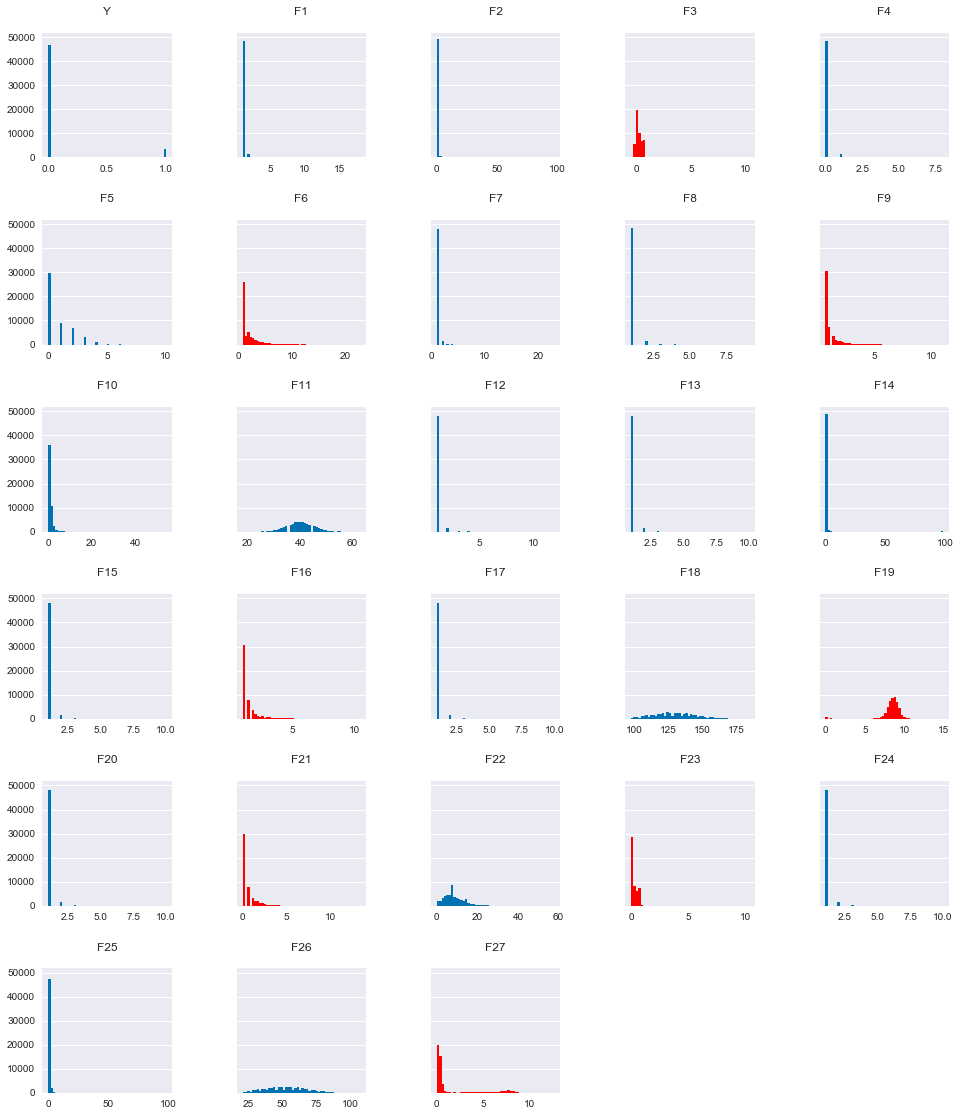

In [11]:
# Plot feature histograms
import math

# Set subplots layout
cols = 5
rows = math.ceil (D2.shape[1]/cols)
fig, ax = plt.subplots (rows, cols, figsize=(3.25*cols,3.25*rows), sharey=True)
plt.subplots_adjust (hspace=.5, wspace=.5)

# Plot histograms
for i, (a, col) in enumerate (zip (ax.flat, D2)):
    plt.sca (a)
    if D2[col].nunique () > 100:
        plt.hist (np.log1p (D2[col]), bins=50, color='r')
    else:
        plt.hist (D2[col], bins=50)
    plt.grid (axis='x')
    plt.title (col + '\n')

# Clip unused axes
for a in ax.flat[D2.shape[1]:]:
    plt.delaxes (a)

Conv1D shape analysis
---

`kernel size` refers to receptive field of kernel (the width of a kernel of 2 elements but power-of-two dilation).

Dilation changes the effective kernel size by:

$$\text{kernel_size} = \text{kernel_size} + (\text{kernel_size} - 1) * (\text{dilation} - 1)$$

| dilation rate | kernel_size |
| :-----------: | :---------: |
|       1       |      2      |
|       2       |      3      |
|       4       |      5      |
|       8       |      9      |
|      16       |     17      |
|      32       |     33      |

When $\text{dilation} = 2^{k-1}$ at layer $k$ and $\text{kernel_size} = 2$:

$$\text{kernel_size} = (2) + (2 - 1) * (2^{k-1} - 1) = 2^{k-1} + 1$$

`output width` refers to the width of the output with 'valid' padding


| kernel size | output width |
| :---------: | :----------: |
|     2       |        3     |
|     3       |        1     |


| kernel size | output width |
| :---------: | :----------: |
|     2       |        7     |
|     3       |        5     |
|     5       |        1     |


| kernel size | output width |
| :---------: | :----------: |
|     2       |       15     |
|     3       |       13     |
|     5       |        9     |
|     9       |        1     |


After $k$ layers, output dims is trimmed in width by $2^{k}-1$.

If $N = 2^{k}$, then output dims is reduced to $1$ after $k$ layers.

# EDIT: Actually just use valid padding
For $N=8$, this picture shows which outputs are actually used with valid padding. Many are wasted.
Same padding would make use of these unused outputs and is no worse than any other substitute estimate for the later samples in an input block.

`
[.][.][.][.][.][.][.][.]  input
[.] . [.] . [.] . [.]     layer 1 output
[.] .  .  . [.]           layer 2 output
[.]                       layer 3 output`

In [ ]:
tf.InteractiveSession ()

In [ ]:
# Scratch area: Just testing
a = tf.convert_to_tensor (np.r_['0,2',[0,0,0,4],[4,0,0,8],[8,0,0,12],[12,0,0,16]])
# tf.cast (a > 0, tf.double) * a
# a[1::2],a

b = tf.zeros ([4,4])
b = a
a *= 3
b += b
b.eval (), a.eval ()


In [ ]:
c = tf.Variable (tf.constant (.5, shape=[4,1]))
tf.get_default_session ().run (tf.global_variables_initializer ())
print (a.eval ())
d = tf.concat ([tf.cast (a, tf.float32), c], axis=-1)
e = c * 200
with tf.control_dependencies ([e]):
    print (d.eval ())

In [ ]:
f = tf.zeros ([2,4,2,3])
f = tf.expand_dims (f, axis=-4)
f.eval (), f.shape

In [ ]:
a=tf.constant (0, shape=[2,2])
b = a[:,1]
b

In [ ]:
a = np.r_[0:4]
b = np.zeros ([4])
b = a[:]
a *= 2
b, a

In [ ]:
a = np.r_[5,2,6,3,7]
f = np.r_[range (5)]
random.shuffle (f)
g = np.argsort (a[f])
a[f[g]]

# Hypothesis

Prediction on many input samples (specifically on input blocks of size &lt;PARAMS.width&gt;) which are sorted in order of their predicted likelihood provides a stronger inductive bias for improving the AUC loss.

A convolutional hierarchical structure will hopefully "compare" samples in an input block as it is forming a likelihood estimate.

In [50]:
# Configure model parameters

class PARAMS:
    k = 6
    width = 2**(k)
    batch_size = 64
    computed_batch_size = batch_size + width - 1
    kernel_size = 2
    depth = k
    output_channels = 128
    projection_channels = 64
    num_refinements = 6
    refinement_weight = 0.33
    learning_rate = 0.01
    learning_rate_decay = 0.33
    
    @staticmethod
    def to_dict ():
        return {
            param: getattr (PARAMS, param)
            for param in dir (PARAMS) if ('__' != param[:2] and param != 'export')
        }
    
    @staticmethod
    def to_json (filepath=None, return_str=False):
        from os.path import abspath
        import os, errno
        import json
        
        if filepath is None:
            try:
                PARAMS.model_dir = abspath (PARAMS.model_dir)
                filepath = PARAMS.model_dir + '/PARAMS.json'
            except (AttributeError, TypeError):
                filepath = abspath ('PARAMS.json')
        
        if return_str:
            return json.dumps (PARAMS.to_dict (), filepath)
        else:
            with open (filepath, 'wt') as f:
                json.dump (PARAMS.to_dict (), f)
            print ('PARAMS saved to: {}.'.format (filepath))

In [17]:
# Set up input pipeline
import math

# Imports
categorical_column_with_vocabulary_list = tf.feature_column.categorical_column_with_vocabulary_list
embedding_column = tf.feature_column.embedding_column
numeric_column = tf.feature_column.numeric_column


# Preprocess features according to type:
# Make embeddings for categorical features
categorical = []

for col_idx in categorical_cols:
    name = D2.columns[col_idx]
    unique = set (D2.iloc[:,col_idx].unique ()).union (DTest.iloc[:,col_idx-1].unique ())
    column = categorical_column_with_vocabulary_list (
        key=name,
        vocabulary_list=list (unique)
    )
#     embedded = embedding_column (column, math.ceil (math.log2 (len (unique))))
    embedded = embedding_column (column, 3)
    categorical.append (embedded)
    
    
# No preprocessing for continuous features
continuous = [numeric_column (D2.columns[col_idx]) for col_idx in continuous_cols]

In [18]:
# Trying to get metrics to work
# Copied lots of code from here:
#   https://github.com/tensorflow/tensorflow/issues/4814#issuecomment-314801758

class MetricOp(object):
    def __init__(self, name, value, update, reset):
        self._name = name
        self._value = value
        self._update = update
        self._reset = reset

    @property
    def name(self):
        return self._name

    @property
    def value(self):
        return self._value

    @property
    def update(self):
        return self._update

    @property
    def reset(self):
        return self._reset


def create_metric(scope: str, metric: callable, **metric_args) -> MetricOp:
    with tf.variable_scope(scope) as scope:
        metric_op, update_op = metric(**metric_args)
        scope_vars = tf.contrib.framework.get_variables(
            scope.original_name_scope, collection=tf.GraphKeys.LOCAL_VARIABLES)

        if len(scope_vars) == 0:
            raise Exception("No local variables found.")

        reset_op = tf.variables_initializer(scope_vars)
    return MetricOp('MetricOp', metric_op, update_op, reset_op)


class ResetHook(tf.train.SessionRunHook):
    """Hook to perform reset metrics every N steps."""

    def __init__(self, reset_op, every_step=50):
        self.reset_op = reset_op
        self.every_step = every_step
        self.reset = False

    def begin(self):
        self._global_step_tensor = tf.train.get_global_step()
        if self._global_step_tensor is None:
            raise RuntimeError("Global step should be created to use ResettableMetricHook.")

    def before_run(self, run_context):
        if self.reset:
            return tf.train.SessionRunArgs(fetches=self.reset_op)
        return tf.train.SessionRunArgs (fetches=self._global_step_tensor)

    def after_run(self, run_context, run_values):
        if self.reset:
            self.reset = False
            return
        global_step = run_values.results
        if global_step % self.every_step == 0:
            self.reset = True

In [67]:
# Build model

# Imports
Estimator = tf.estimator
batch_normalization = tf.layers.batch_normalization
Conv1D = tf.layers.Conv1D
input_layer = tf.feature_column.input_layer
import math
from functools import reduce
from itertools import chain


# Model definition
def model_fn (features, labels, mode, params):
    
    # (Step 0)
    # Identify run mode
    TRAIN, EVAL, PREDICT = [mode == getattr (Estimator.ModeKeys, e) for e in ['TRAIN', 'EVAL', 'PREDICT']]
        
        
    # (Step 1)
    # Make input layer of all features, shape: (PARAMS.computed_batch_size, len (features))
    inputs = input_layer (features, params['feature_columns'])
    
    # Normalize inputs
    inputs = batch_normalization (inputs, training=TRAIN)
    
    # Inform tensorflow of the batch size
    inputs.set_shape ([PARAMS.computed_batch_size, None])
    

    # (Step 2)
    # Configure convolutional layers
    # Each layer module contains a pair <projection, layer> to be applied
    # together in a residual block.
    # First layer module doesn't have a projection.
    
    first_layer = [
        None,
        Conv1D (
            filters=PARAMS.output_channels,
            kernel_size=PARAMS.kernel_size,
            padding='same',
            name='Conv1D_First_Layer'
        )
    ]
    
    layers = [
        [
            Conv1D (
                filters=PARAMS.projection_channels,
                kernel_size=1,
                activation=tf.nn.leaky_relu,
                name='Conv1D_{}_Projection'.format (i)
            ),
            Conv1D (
                filters=PARAMS.output_channels,
                kernel_size=PARAMS.kernel_size,
                padding='same',
                dilation_rate=2**i,
                name='Conv1D_{}_Dilation_{}'.format (i, 2**i)
            )
        ]
        for i in range (1, PARAMS.depth)
    ]
    
    final_layer = [
        Conv1D (
            filters=PARAMS.projection_channels,
            kernel_size=1,
            activation=tf.nn.leaky_relu,
            name='Final_Layer_Projection'
        ),
        Conv1D (
            filters=2,
            kernel_size=1,
            name='Final_Layer'
        )
    ]
    
    # Attach dilation_rate to layer
    for i, (_, layer) in enumerate (layers, 1):
        layer.__dilation_rate = 2**i
    
    first_layer[1].__dilation_rate = 1
    final_layer[1].__dilation_rate = 1
    
    
    # Step (3)
    # Define residual connection block with batch normalization and relu activation
    def connect (inputs, layer_module, residual=True, activation=tf.nn.leaky_relu):
        print ('Apply layer: {}...'.format (layer_module[1].name))
        
        # Apply projection if exists
        projection, layer = layer_module
        if projection is not None:
            result = projection (inputs)
        else:
            result = inputs
            
        # Calculate required padding if using dilated convolution
        if layer.__dilation_rate > 1:
            required_padding, crops = tf.required_space_to_batch_paddings (result.shape, [1, 2, 1])
            result = tf.pad (result, required_padding)
            
        # Apply main convolution
        result = layer (result)
        
        # Trim required padding if used
        if layer.__dilation_rate > 1:
            result = tf.slice (
                result,
                begin=required_padding[:, 0],
                size=inputs.shape
            )
        
        # Apply residual shortcut
        if residual:
            result += inputs
        
        # Apply batch normalize and activation
        result = batch_normalization (result, training=TRAIN)
        if activation:
            result = activation (result)
        
        return result
    
    # Define helper function to run layers
    def apply_to (inputs):
        result = reduce (
            connect,
            layers,
            connect (inputs, first_layer, residual=False)
        )
        result = connect (result, final_layer, residual=False, activation=None)
        
        return result
    
    
    # Step (4)
    # Repeatedly make predictions and sort inputs based on these prediction values
    # Hopefully this will "refine" the predictions
    
    def refinement_round (i, sorted_indices, estimates, old_logits):
        # Concatenate estimates column to inputs and apply sorted indices to sort by estimates
        augmented_inputs = tf.concat ([inputs, estimates], axis=-1)
        augmented_inputs = tf.gather (augmented_inputs, sorted_indices)
        
        # Apply layers
        augmented_inputs = tf.expand_dims (augmented_inputs, 0)
        logits = apply_to (augmented_inputs)
        logits = tf.squeeze (logits)
        
        # Reorder logits in terms of initial inputs ordering.
        inverse_indices = tf.invert_permutation (sorted_indices)
        logits = tf.gather (logits, inverse_indices)
        
        # Prepare next estimates column
        estimates = tf.nn.softmax (logits)
                
        # Find new sorted indices according to estimates
        estimates = estimates[:, 1:]
        _, sorted_indices = tf.nn.top_k (
            tf.squeeze (estimates),
            k=inputs.shape[0],
            name='Sorted_Indices_By_Estimates_Op'
        )
        
        return i+1, sorted_indices, estimates, logits
    
    # Prepare inputs for refinements
    sorted_indices = tf.range (inputs.shape[0])
    estimates = tf.constant (
        params['class_one_probability'],
        dtype=tf.float32,
        shape=[inputs.shape[0], 1]
    )
    logits = tf.zeros ([inputs.shape[0], 2])
    initial_values = refinement_round (-1, sorted_indices, estimates, logits)
    
    # Run refinements
    _, _, probabilities, logits = tf.while_loop (
        lambda i, _0, _1, _2: i < PARAMS.num_refinements,
        refinement_round,
        initial_values
    )
        
    # Calculate a "refinement loss" to encourage "self-consistency"
    if TRAIN:
        refinement_loss = tf.nn.softmax_cross_entropy_with_logits_v2 (
            labels=tf.concat ([1-probabilities, probabilities], -1),
            logits=initial_values[3]
        )
        refinement_loss = tf.reduce_mean (refinement_loss, name='Refinement_Loss_Op')
        tf.summary.scalar ('Refinement_Loss', refinement_loss)
    else:
        refinement_loss = tf.constant (0)
    
    
    # Step (5)
    # Layers are built. Count and report number of parameters in layers
    def count_and_report (layer):
        count = layer.count_params ()
        print ('Memory Usage {}: {} params, {:.2f} KB'.format (layer.name, count, count * 4 / 1024))
        return count
    
    layer_params_count = 0
    for projection, layer in [first_layer] + layers + [final_layer]:
        if projection:
            layer_params_count += count_and_report (projection)
        layer_params_count += count_and_report (layer)
            
    print ('Total Usage: {} params, {:.2f} MB'.format (layer_params_count, layer_params_count * 4 / 1024 / 1024))
    
    
    # Step (6)
    # Output predictions
    if PREDICT:
        output = {
            'probabilities': probabilities
        }
#         return Estimator.EstimatorSpec (mode=mode, predictions=output)
        return Estimator.EstimatorSpec (mode=mode, predictions=probabilities)


    # Step (7)
    # Define loss and metrics
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits (
        labels=labels,
        logits=logits
    )
    cross_entropy = tf.reduce_mean (cross_entropy, name='Cross_Entropy')
    refinement_weight = params['refinement_weight']
    loss = (1 - refinement_weight) * cross_entropy + refinement_weight * refinement_loss
    
    avg_probability = tf.reduce_mean (probabilities, name='Avg_Probability')
    
    auc = create_metric (
        'AUC_Metric',
        tf.metrics.auc,
        labels=labels,
        predictions=probabilities
    )
    
    accuracy = create_metric (
        'Accuracy_Metric',
        tf.metrics.accuracy,
        labels=labels,
        predictions=tf.round (probabilities)
    )
    
    metrics = {
        'AUC': [auc.value, auc.update],
        'Accuracy': [accuracy.value, accuracy.update],
    }
    
    
    # Step (8)
    # Report metrics
    if EVAL:
        return Estimator.EstimatorSpec (mode=mode, loss=loss, eval_metric_ops=metrics)
            
    # Create "hook" to print metrics during training as well
    logging_hook = tf.train.LoggingTensorHook (
        {
            'AUC': auc.update,
            'Avg Probability': avg_probability,
            'Cross Entropy': cross_entropy,
            'Refinement Loss': refinement_loss,
        },
        every_n_iter=10
    )
    
    # Reset metrics because they are "streaming" operations by default
    auc_reset_hook = ResetHook (auc.reset, 100)
    accuracy_reset_hook = ResetHook (accuracy.reset, 100)
    with tf.name_scope ('Metrics'):
        tf.summary.scalar ('AUC', auc.update)
        tf.summary.scalar ('Accuracy', accuracy.update)
    
    
    # Step (9)
    # Optimize loss
    if TRAIN:
        global_step = tf.Variable(0, trainable=False)
        learning_rate = tf.train.exponential_decay (
            learning_rate=params['learning_rate'],
            global_step=tf.train.get_global_step(),
            decay_steps=params['max_steps'],
            decay_rate=params['learning_rate_decay'],
        )
        optimizer = tf.train.AdamOptimizer (learning_rate=learning_rate)
        train_op = optimizer.minimize (loss, global_step=tf.train.get_global_step())
        
        return Estimator.EstimatorSpec (
            mode=mode,
            loss=loss,
            train_op=train_op,
            training_hooks=[
                logging_hook,
                auc_reset_hook,
                accuracy_reset_hook,
            ]
        )
    

In [71]:
Estimator = tf.estimator

def make_model () -> Estimator.Estimator:
    # Set custom run configuration
    config = Estimator.RunConfig (
        model_dir=PARAMS.model_dir,
        save_summary_steps=50
    )

    # Instantiate from model_fn
    model = Estimator.Estimator (
        model_fn,
        params=PARAMS.to_dict (),
        config=config
    )
    
    return model

In [ ]:
# Train model
from sklearn.model_selection import train_test_split

# Set hyperparameters
PARAMS.variant = 'lr=.01,refine=6,refine_wt=.33,batch=127,lr_decay=.33,eval=True'
PARAMS.class_one_probability = sum (D2['Y'] == 1) / len (D2)
PARAMS.epoch_steps = len (D2)//PARAMS.computed_batch_size
PARAMS.epochs = 10
PARAMS.max_steps = PARAMS.epochs * PARAMS.epoch_steps
print ('Epoch steps: {}'.format (PARAMS.epoch_steps))
PARAMS.feature_columns = categorical + continuous
PARAMS.model_dir = 'model_dir' + '/' + PARAMS.variant


# Make train/test split
D2train, D2test = train_test_split (D2, test_size=.33, random_state=23, stratify=D2['Y'])


# Define training and Eval input functions
train_fn = Estimator.inputs.pandas_input_fn (
    x=D2train.iloc[:,1:],
    y=D2train['Y'],
    batch_size=PARAMS.computed_batch_size,
    num_epochs=None,
    shuffle=True,
    num_threads=8,
    target_column='Y'
)

eval_fn = Estimator.inputs.pandas_input_fn (
    x=D2test.iloc[:,1:],
    y=D2test['Y'],
    batch_size=PARAMS.computed_batch_size,
    num_epochs=None,
    shuffle=True,
    num_threads=8,
    target_column='Y'
)


# Train
train_spec = Estimator.TrainSpec (train_fn, PARAMS.max_steps)
eval_spec = Estimator.EvalSpec (eval_fn)
Estimator.train_and_evaluate (make_model (), train_spec, eval_spec)


# Save hyperparameters to file (do last, after tensorflow makes necessary folder)
PARAMS.to_json ()

Epoch steps: 393
INFO:tensorflow:Using config: {'_model_dir': 'model_dir/lr=.01,refine=6,refine_wt=.33,batch=127,lr_decay=.33,eval=True', '_tf_random_seed': None, '_save_summary_steps': 50, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000016FD2BCD048>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after 600 secs (eval_spec.throttle_secs) or training is finished.
INFO:tensorflow:Calling model_fn.
Apply layer: Conv1D_First_Layer...
Apply layer: Conv1D_1_Dilation_2...
Apply layer

In [ ]:
# Make Predictions
from itertools import starmap

# Make input_fn
pad_by = PARAMS.computed_batch_size - len (DTest) % PARAMS.computed_batch_size
pad_rows = pd.DataFrame ([DTest.iloc[-1]] * pad_by, columns=DTest.columns)
pad_rows = pad_rows.astype (DTest.dtypes.to_dict ())
predict_fn = tf.estimator.inputs.pandas_input_fn (
    DTest.append (pad_rows),
    batch_size=PARAMS.computed_batch_size,
    num_epochs=1,
    shuffle=False
)


# Helper function to write predictions to file
def submit (generator, filepath, bufsize=1000, to_string=True, **pandas_kws):
    '''Each row outputted by generator should be an array of string-convertible elements.'''

    first = True
    if to_string:
        generator = map (lambda row: list (map (str, row)), generator)

    while True:
        buffer = pd.DataFrame (row for (_, row) in zip (range (bufsize), generator))
        buffer.to_csv (filepath, **pandas_kws) # no-op if buffer is empty
        if first:
            first = pandas_kws['header'] = False
            if 'mode' in pandas_kws:
                pandas_kws['mode'] = pandas_kws['mode'].replace ('w','').replace ('x','a')
            else:
                pandas_kws['mode'] = 'a'
        if not buffer.size:
            break
submit.__doc__ = 'See pandas.DataFrame.to_csv() docs below:\n\n' + pd.DataFrame.to_csv.__doc__


# Stream predictions to file
filename = model.latest_checkpoint () + '.submission.csv'
generator = map (lambda row: row['probabilities'], make_model ().predict (predict_fn))
generator = starmap (lambda id_, row: [id_] + list (row), zip (DTest.index, generator))
submit (
    generator,
    filename,
    index_label='id',
    header=['id', 'Y'],
    mode='x',
    index=False,
)

In [ ]:
# Ask stackoverflow why my 10MB dataset takes over ten minutes on just the first iteration
# Other steps take 8 seconds each
# Batch size is 128
# input_fn uses ...
# I've tried changing some of the ConfigProto settings (reference related github thread) to turn off graph optimization
#  https://github.com/tensorflow/tensorflow/blob/r1.7/tensorflow/core/protobuf/config.proto
# I've tried changing the pre-allocated memory
# Actually not limiting pre-allocation seems to go faster. 380 second initial stall instead of 900 + 600.
# (no pre-alloc finished in 1700sec)
# Device: GTX 1060 GPU with 6GB memory, 7th gen intel i7 CPU with 16GB memory
# nvidia-smi doesn't show how much memory python.exe is using
# model weight count is: ...


# Try running more than one batch_count's worth at once, since each independent run needs the initial overhead...
# See if running 3 * batch_count steps is faster than doing 3 separate runs of batch_count steps.
#   - 580sec, 280sec stalls on variant <lr=.01,refine=3,batch=127,class_weight=True> with 10 epochs.
#      - finished all 10 epochs in 1400sec!
#      - well worth it!


# Try learning rate decay on Adam starting at 0.01
# Set up hook for auc and accuracy metrics (probably need to learn this for learning rate decay too anyway)
# Try momentum, rmsprop, adagrad
# rename model variant folders

# 6500sec, 3300sec delays for batch 255, then 3 minutes
# How to turn cudnn optimization off!
#   - Turning refinements into a while_loop sped things up considerably, now not needed.

# Split train_final so we have an evaluation set...
#   - Try this after submitting a prediction
# Try fewer embedding dimensions

# Change name of folder to have batch=255:
# lr=.01,refine=6,looped=True,batch=127,lr_decay=.1